In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv("movie_ratings.csv")

In [3]:
df.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [4]:
#view column names
df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [5]:
#rename columns
df.rename(columns={'Day of Week':'Day_of_Week','Adjusted Gross ($mill)':'Adjusted_Gross',
                   'Budget ($mill)':'Budget','Gross ($mill)':'Gross','IMDb Rating':'IMDb_Rating',
                    'MovieLens Rating':'MovieLens_Rating','Overseas ($mill)':'Overseas','Profit ($mill)':'Profit',
                   'US ($mill)':'US','Movie Title':'Movie','Release Date':'Release_Date',
                   'Runtime (min)':'Runtime'}, inplace=True)

In [6]:
#drop duplicate rows
df = df.drop_duplicates()

In [7]:
#df.isnull()
#df[['Adjusted_Gross']].isnull()
#df.dropna()
#df.fillna(value = 'NA')
df.isnull().sum()

Day_of_Week         0
Director            0
Genre               0
Movie               0
Release_Date        0
Studio              0
Adjusted_Gross      0
Budget              0
Gross               0
IMDb_Rating         0
MovieLens_Rating    0
Overseas            0
Overseas%           0
Profit              0
Profit%             0
Runtime             0
US                  0
Gross % US          0
dtype: int64

In [8]:
df.describe()

,Adjusted_Gross,Budget,Gross,IMDb_Rating,MovieLens_Rating,Overseas,Overseas%,Profit,Profit%,Runtime,US,Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,545.153125,92.467928,413.466118,6.923849,3.340378,246.332237,57.698849,320.945559,719.278783,117.781250,167.135197,42.301151
std,438.996563,59.421407,258.612104,0.925890,0.454071,184.581069,12.334237,233.887737,1942.807248,23.179122,92.465903,12.334237
min,202.100000,0.600000,200.300000,3.600000,1.490000,46.900000,17.200000,19.900000,7.700000,30.000000,0.000000,0.000000
25%,316.950000,45.000000,246.600000,6.375000,3.037500,135.525000,49.900000,180.700000,201.850000,100.000000,106.950000,33.700000
50%,425.950000,80.000000,327.750000,6.900000,3.365000,189.650000,58.200000,247.700000,338.550000,116.000000,141.700000,41.800000
75%,645.625000,130.000000,475.500000,7.600000,3.672500,283.650000,66.300000,389.750000,650.100000,130.250000,202.100000,50.100000
max,6846.700000,300.000000,2788.000000,9.200000,4.500000,2027.500000,100.000000,2551.000000,41333.300000,238.000000,760.500000,82.800000


In [9]:
df.Movie.describe()

count       608
unique      608
top       Hitch
freq          1
Name: Movie, dtype: object

In [10]:
df.Movie.value_counts().head()
#df[df.Movie == '300'].describe()

Hitch                   1
Saturday Night Fever    1
Transformers            1
Dr. Seuss' The Lorax    1
Hercules                1
Name: Movie, dtype: int64

In [11]:
df['Day_of_Week'] = df['Day_of_Week'].astype('category')
df['Day_of_Week'] = df['Day_of_Week'].cat.set_categories(["Monday","Tuesday","Wednesday", 
                                                   "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [12]:
df["weekend"] = df["Day_of_Week"].isin(["Friday", "Saturday", "Sunday"])

In [13]:
df['top_75_percent_Profit'] = np.where(df['Profit']>= 389.75, 1, 0)
df['top_75_percent_Budget'] = np.where(df['Budget']>= 130, 1, 0)

In [14]:
df.corr()

,Adjusted_Gross,Budget,Gross,IMDb_Rating,MovieLens_Rating,Overseas,Overseas%,Profit,Profit%,Runtime,US,Gross % US,weekend,top_75_percent_Profit,top_75_percent_Budget
Adjusted_Gross,1.000000,0.148537,0.655192,0.272071,0.225777,0.594668,0.042319,0.686806,0.229841,0.341415,0.645391,-0.042319,-0.142326,0.569577,0.148839
Budget,0.148537,1.000000,0.511863,-0.026303,-0.031066,0.536799,0.301011,0.311910,-0.298632,0.218664,0.360020,-0.301011,0.023760,0.302491,0.814685
Gross,0.655192,0.511863,1.000000,0.267442,0.212869,0.967853,0.243778,0.975851,-0.001589,0.280370,0.864803,-0.243778,-0.079368,0.757870,0.410063
IMDb_Rating,0.272071,-0.026303,0.267442,1.000000,0.879836,0.222273,-0.034393,0.302620,0.077253,0.326788,0.304335,0.034393,-0.109011,0.269235,0.044938
MovieLens_Rating,0.225777,-0.031066,0.212869,0.879836,1.000000,0.167901,-0.057060,0.243528,0.049759,0.302791,0.260240,0.057060,-0.095546,0.224809,0.034810
Overseas,0.594668,0.536799,0.967853,0.222273,0.167901,1.000000,0.445308,0.934006,-0.027440,0.277475,0.710714,-0.445308,-0.061369,0.705973,0.425584
Overseas%,0.042319,0.301011,0.243778,-0.034393,-0.057060,0.445308,1.000000,0.193524,-0.084881,0.086538,-0.207146,-1.000000,-0.003783,0.175485,0.225845
Profit,0.686806,0.311910,0.975851,0.302620,0.243528,0.934006,0.193524,1.000000,0.074189,0.254618,0.864833,-0.193524,-0.093927,0.761264,0.246567
Profit%,0.229841,-0.298632,-0.001589,0.077253,0.049759,-0.027440,-0.084881,0.074189,1.000000,-0.042088,0.050342,0.084881,-0.099970,0.052092,-0.147741
Runtime,0.341415,0.218664,0.280370,0.326788,0.302791,0.277475,0.086538,0.254618,-0.042088,1.000000,0.230268,-0.086538,-0.115306,0.188482,0.129244


In [15]:
df['US'].corr(df['Gross'])

0.86480313750312165

## Basic Plots

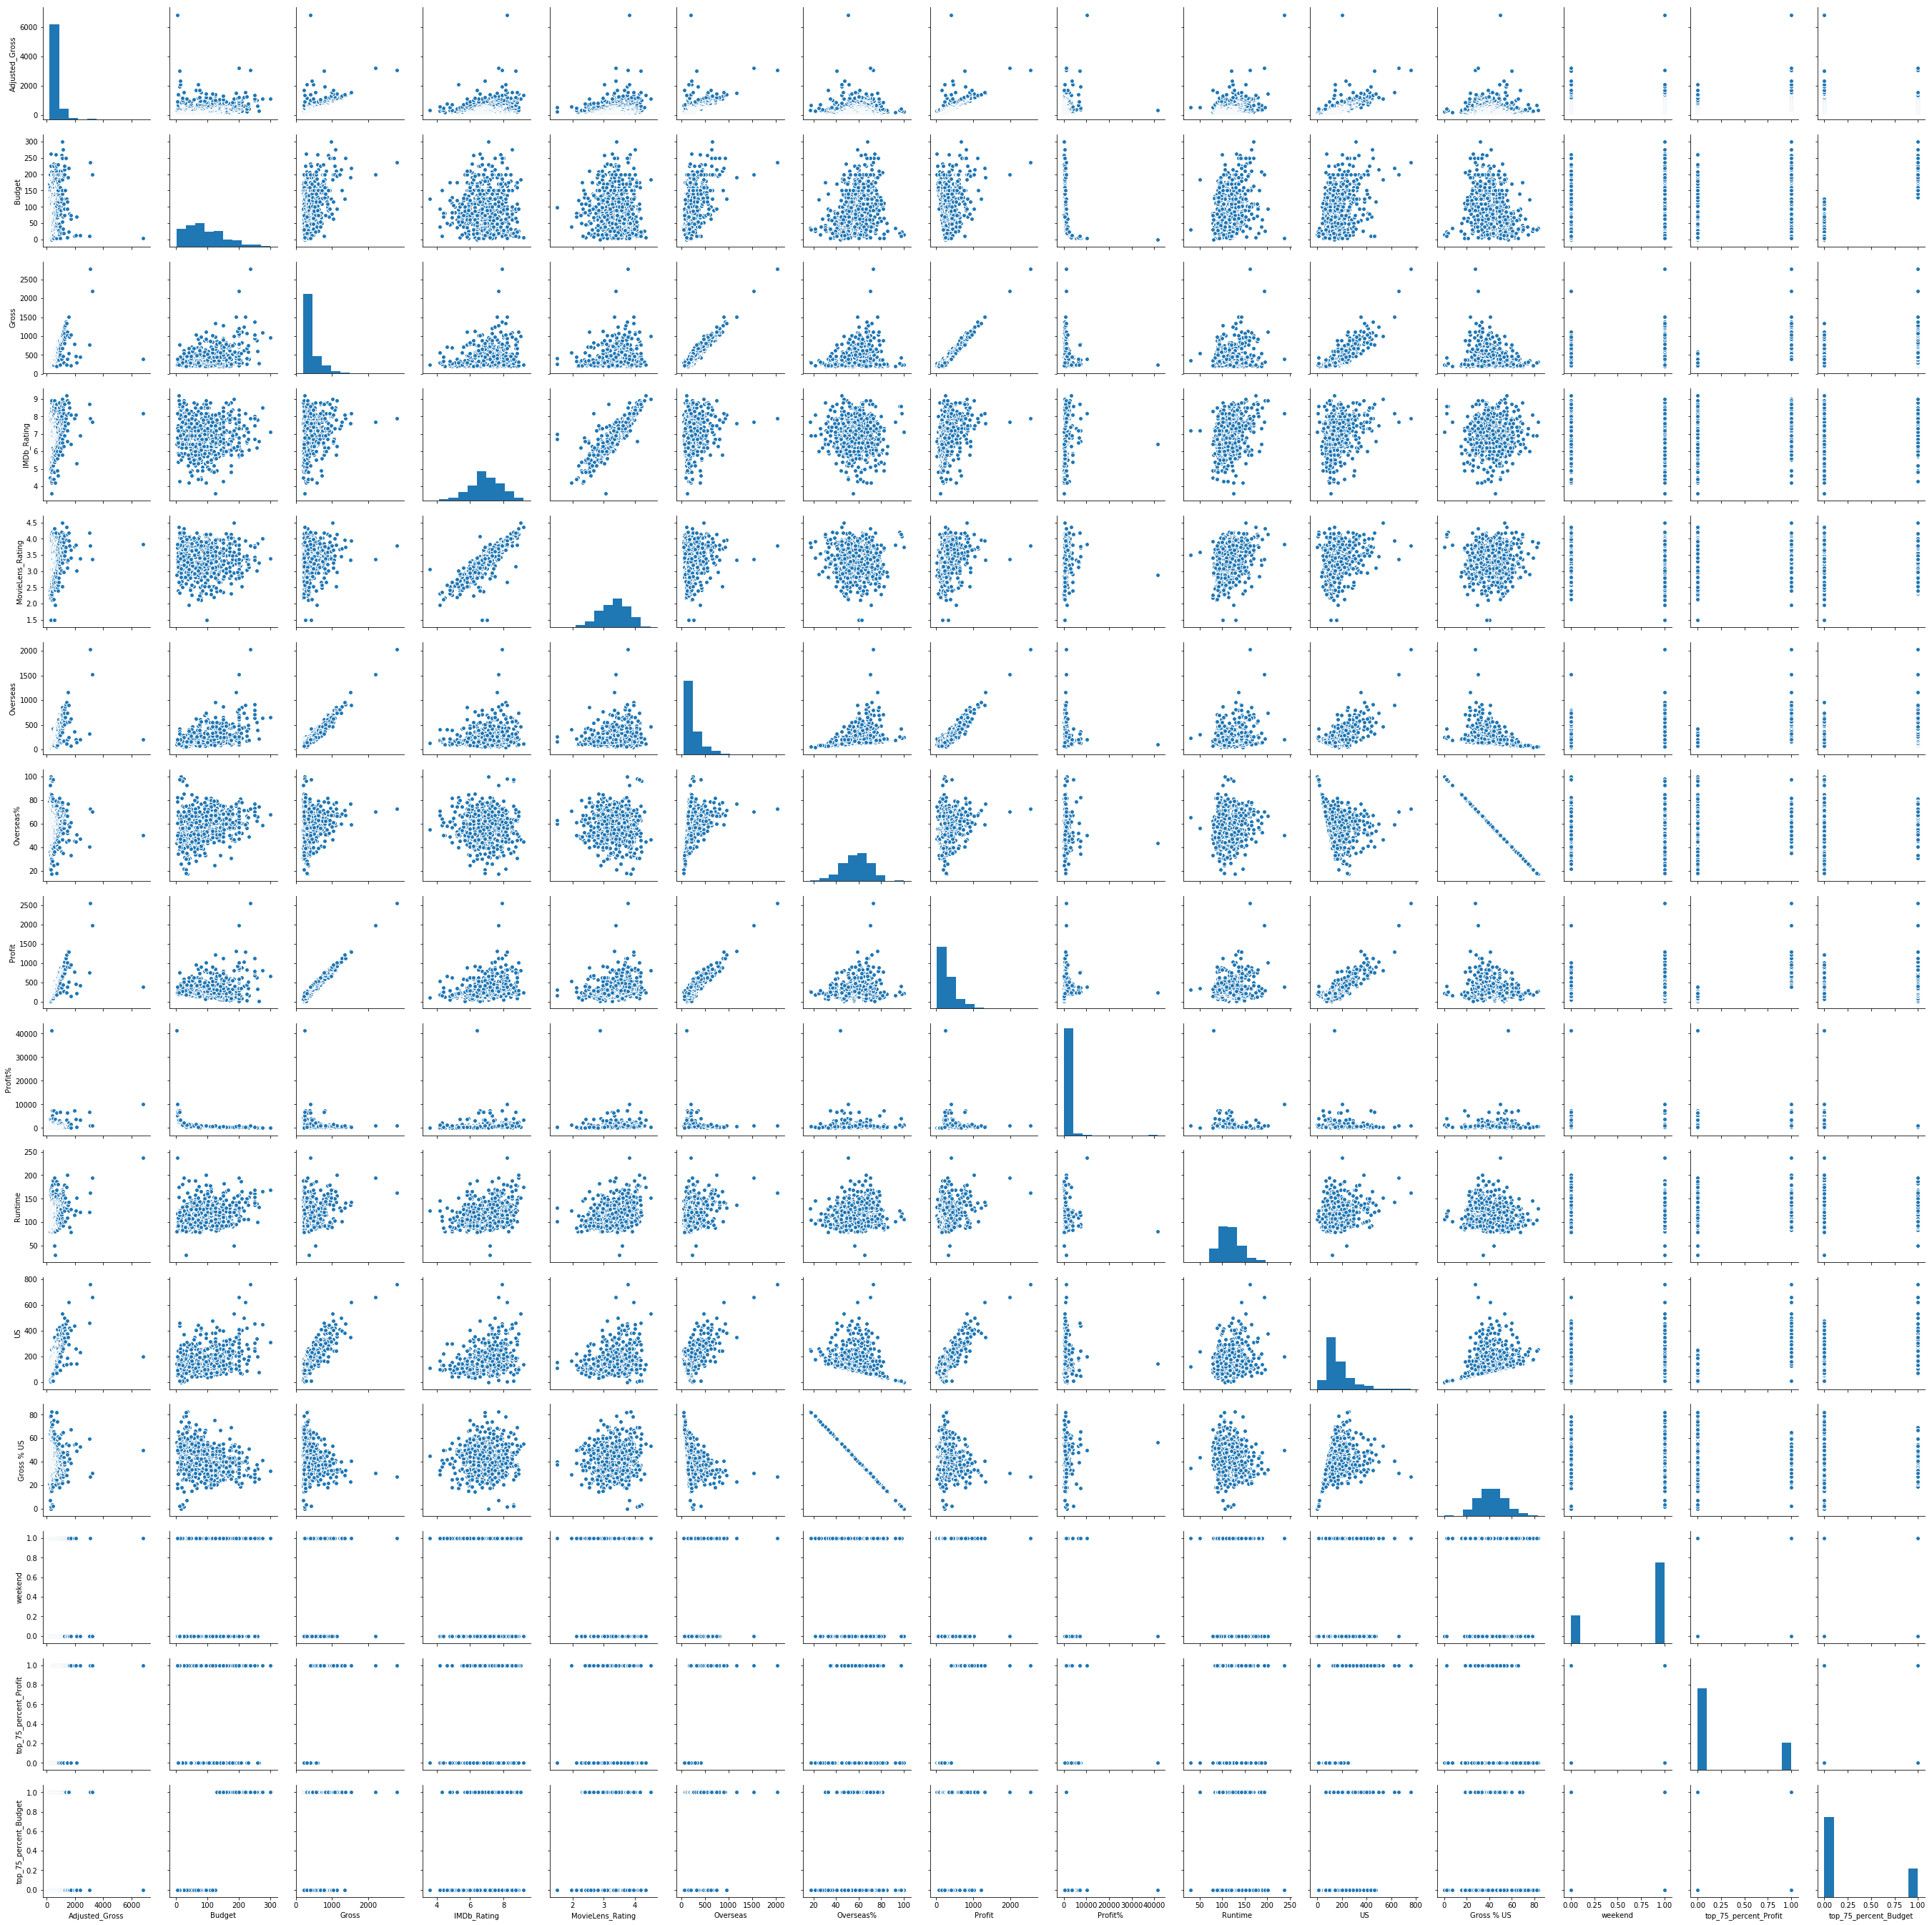

In [16]:
sns.pairplot(df);

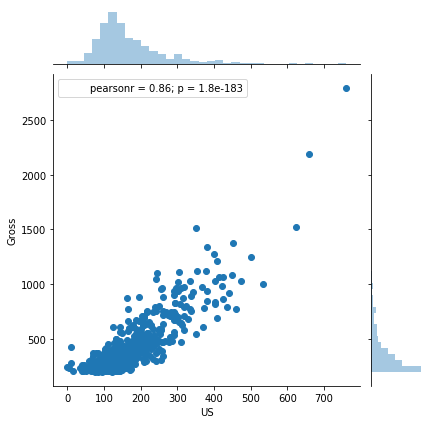

In [17]:
sns.jointplot(x = "US", y = "Gross", data = df);

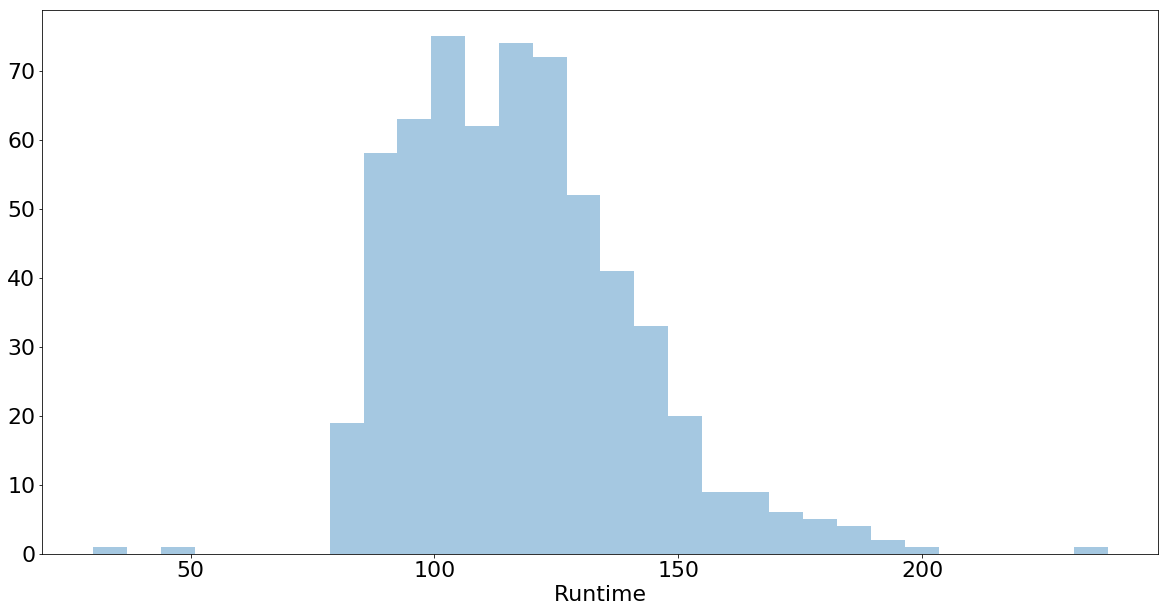

In [19]:
sns.distplot(df['Runtime'], kde = False);

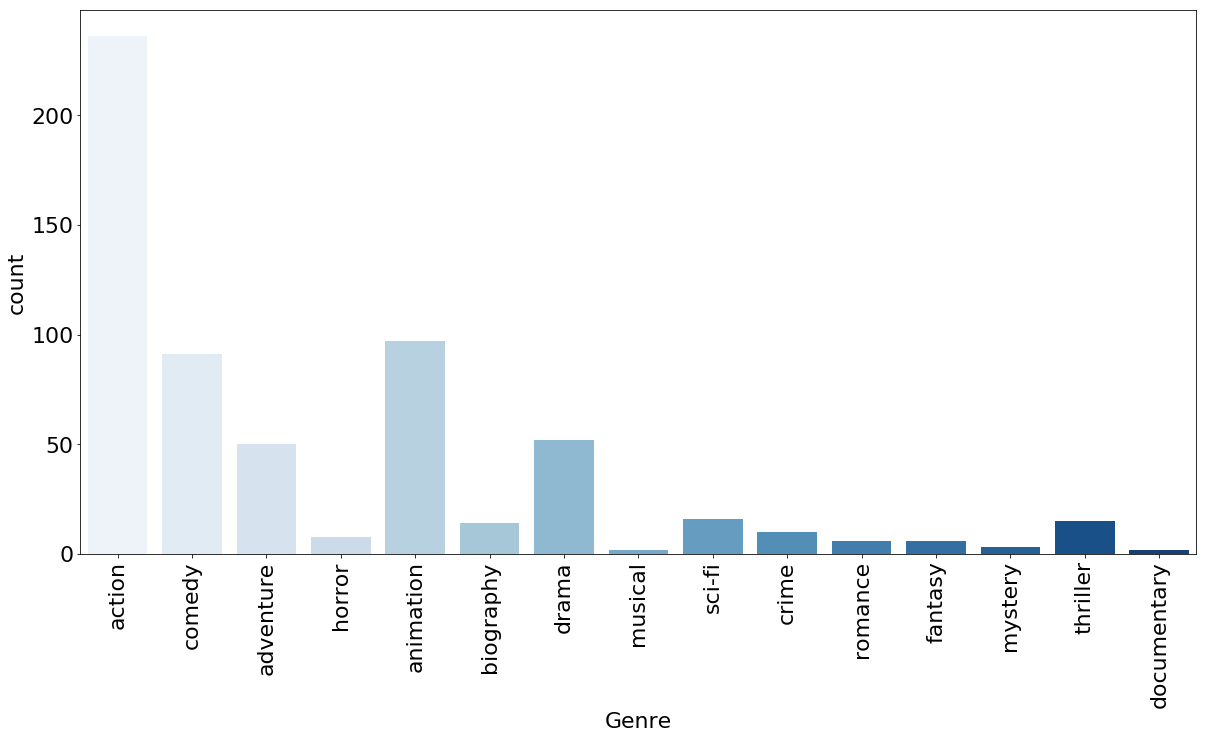

In [20]:
sns.countplot(x="Genre", data=df, palette="Blues")
plt.xticks(rotation = 90);

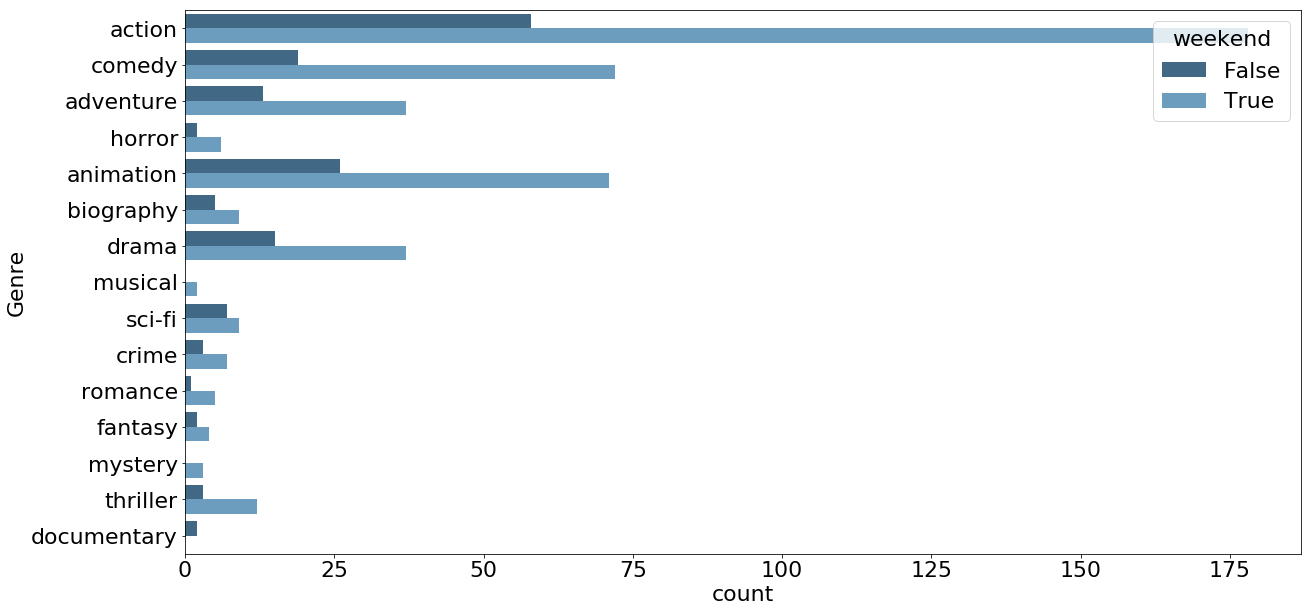

In [21]:
sns.countplot(y="Genre", hue="weekend", data=df, palette="Blues_d");

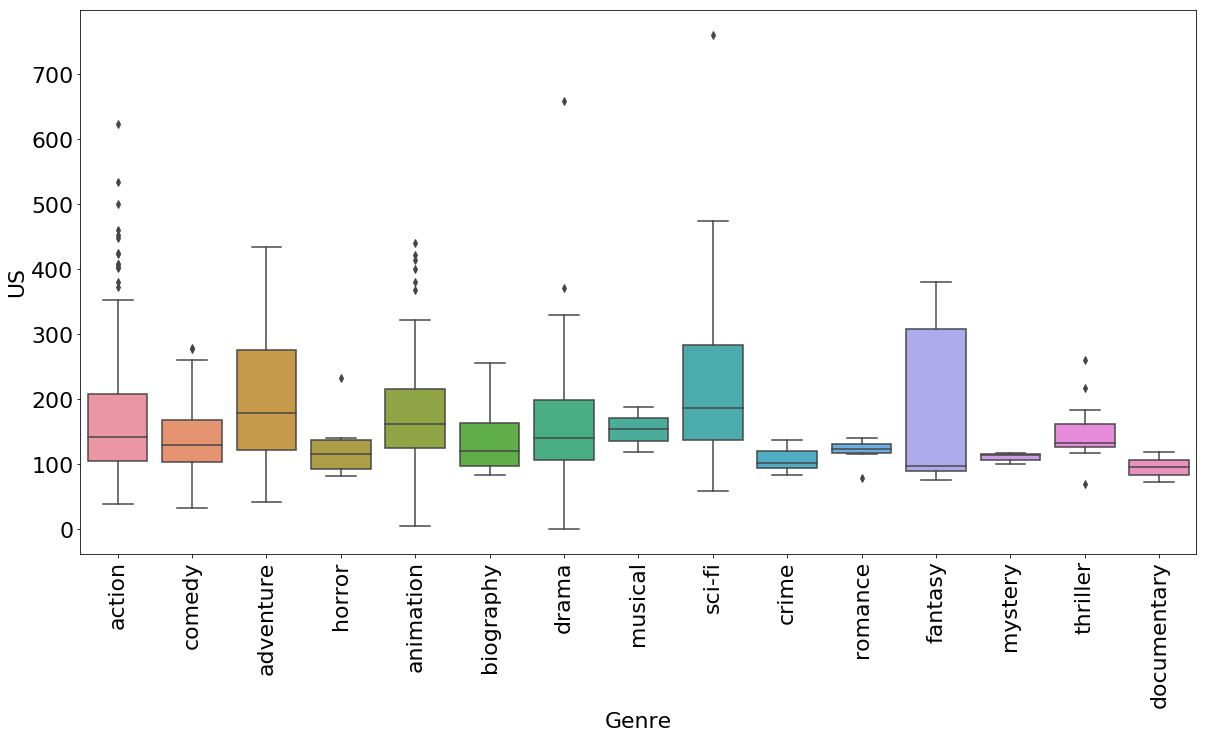

In [22]:
sns.boxplot(x="Genre", y="US", data=df)
plt.xticks(rotation=90);

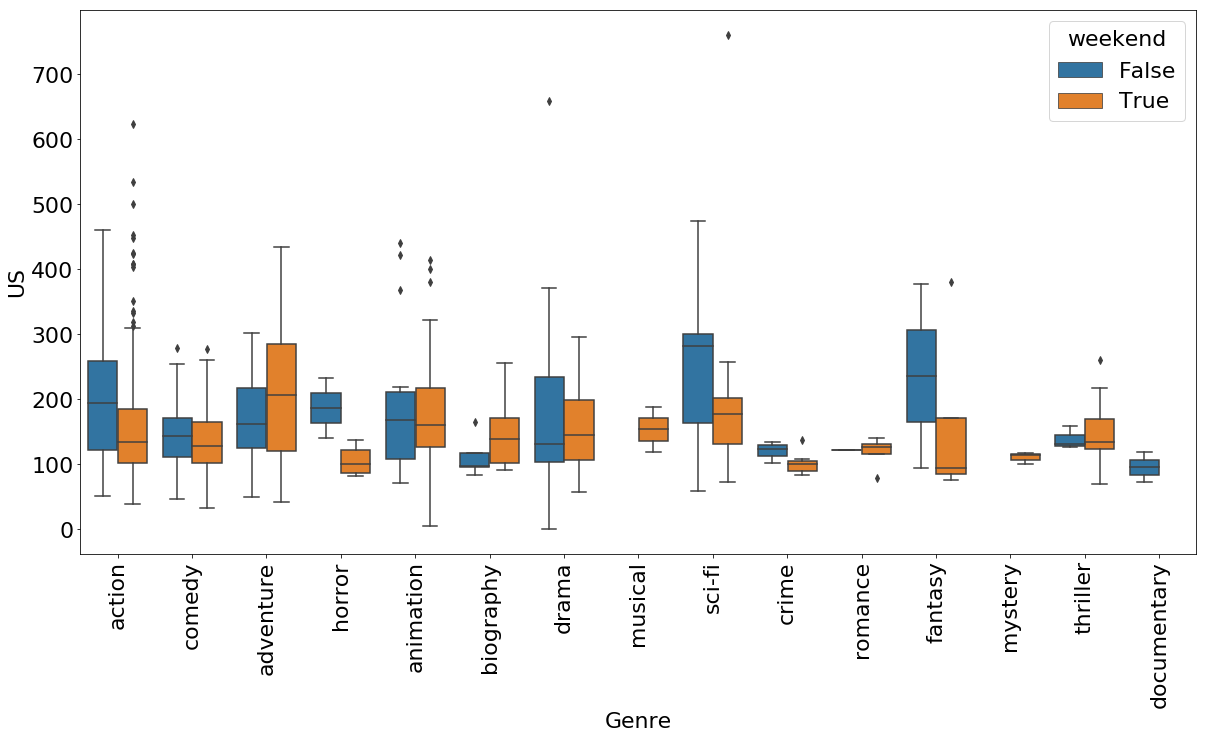

In [23]:
sns.boxplot(x="Genre", y="US", hue="weekend", data=df)
plt.xticks(rotation=90);

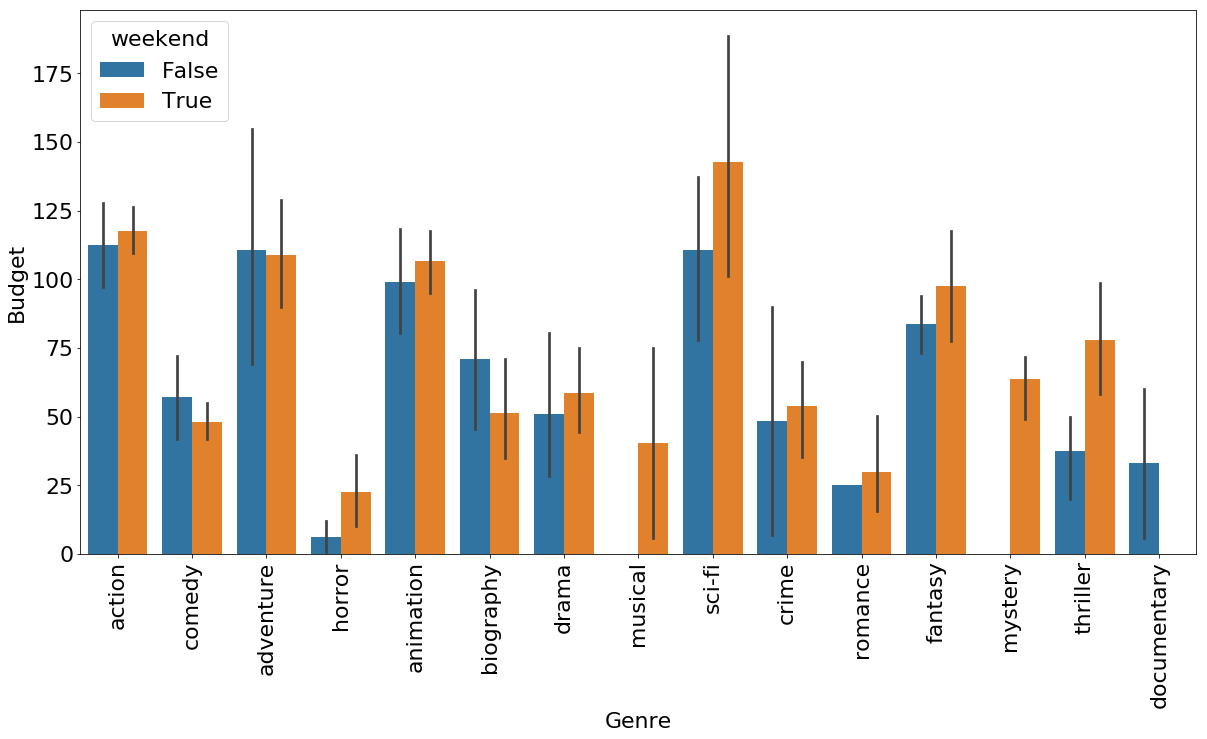

In [24]:
sns.barplot(x="Genre", y="Budget", hue="weekend", data=df)
plt.xticks(rotation = 90);

If your numbers are alarming you'll need a larger sample size if you wish to find small statistically significant differences.

** variance:** an estimate of average variablity (spread) of your data. It is the sum of squares divided by the number of values on which the sum of squares is based - 1.  

** standard deviation: ** an estimate of the average variability (spread) of a set of data measured in the same units of measurement as the original data.

** t-test: ** test if your data is significantly differen from 0 or if two means are significantly different from each other.

In [25]:
#variance = sum((x - mean) ** 2) / (n - 1)

np.var(df['Profit'])

54613.500572384655

In [26]:
variance = sum((df['Profit'] - df['Profit'].mean()) ** 2) / (df['Profit'].count() - 1)
print(variance)
print(np.var(df['Profit']))

54703.4733905
54613.5005724


In [27]:
standard_deviation = variance ** 0.5
print(standard_deviation)
#print(np.std(df['Profit']))
print(np.std(df['Profit'], ddof = 1))

233.887736725
233.887736725


In [28]:
standard_error = standard_deviation / (df['Profit'].count() ** 0.5)
print(standard_error)
print(standard_deviation / (df['Profit'].count() ** 0.5))

9.48540025916
9.48540025916


In [29]:
weekend_summary = df.groupby('weekend').describe()

In [30]:
weekend_summary['Profit'].transpose()

weekend,False,True
count,156.000000,452.000000
mean,358.308974,308.050221
std,249.623571,227.069037
min,35.500000,19.900000
25%,203.675000,176.225000
50%,276.400000,236.750000
75%,463.375000,358.325000
max,1986.800000,2551.000000


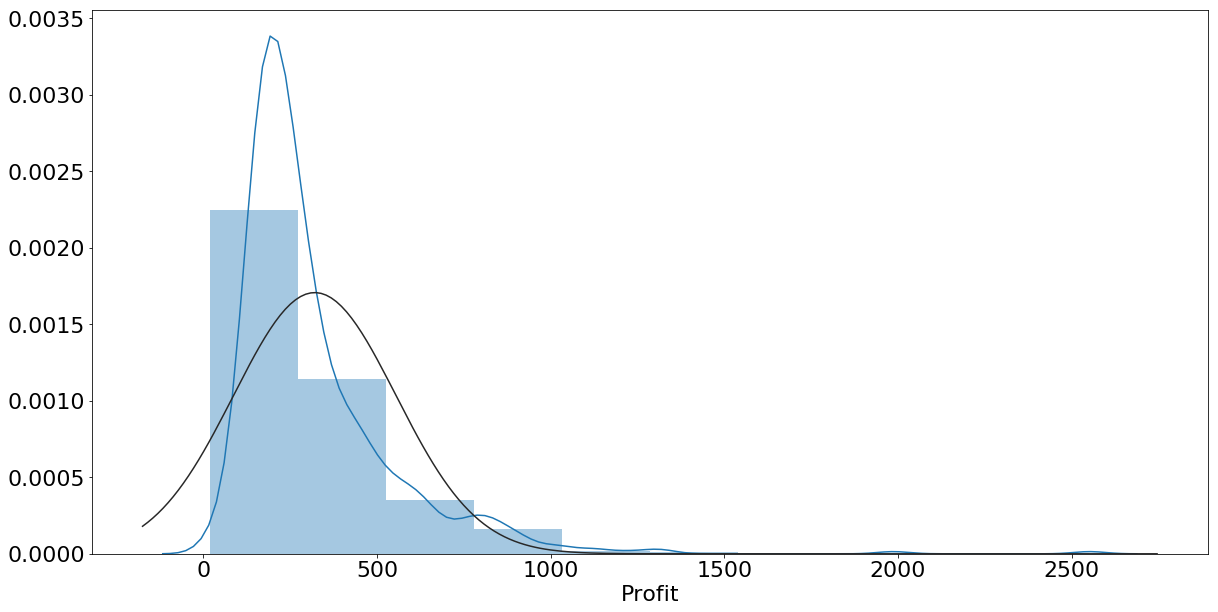

In [31]:
sns.distplot(df['Profit'], bins = 10, fit = stats.norm);

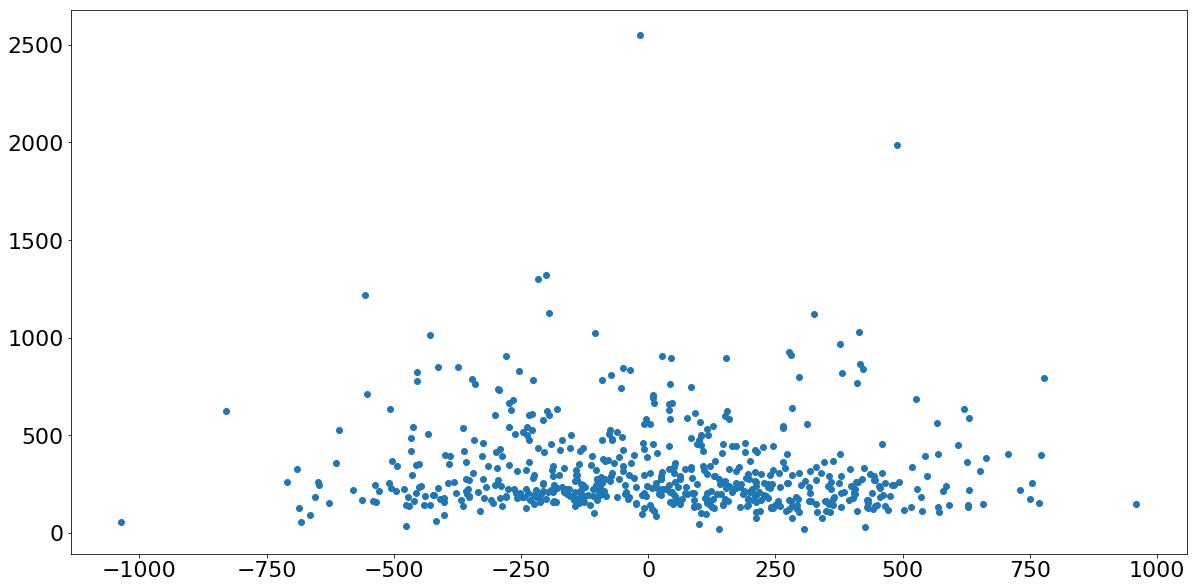

In [32]:
# Making two variables.
rand_norm_qq = np.random.normal(50, 300, 608)
profit = df['Profit']

# Sorting the values in ascending order.
rand_norm_qq.sort
profit.sort_values

# Plotting the variable rand1 against norm in qqplots.
plt.plot(rand_norm_qq, profit, "o");

In [33]:
# How large is each group?
print('weekend sample size:', len(df[df.weekend == 1]))
print('weekday sample size:', len(df[df.weekend == 0]))
print('weekend proportion:', df.weekend.mean())
print()

weekend sample size: 452
weekday sample size: 156
weekend proportion: 0.743421052632



In [34]:
# What is the top 75% of profit rate of test and control?
print('weekend profit rate:', df[df.weekend == 1].top_75_percent_Profit.mean())
print('weekday profit rate:', df[df.weekend == 0].top_75_percent_Profit.mean())

weekend profit rate: 0.223451327434
weekday profit rate: 0.326923076923


In [35]:
# Are the test and control groups significantly different?
stats.ttest_ind(df[df.weekend == 1].top_75_percent_Profit,
                df[df.weekend == 0].top_75_percent_Profit)

Ttest_indResult(statistic=-2.5832325017878643, pvalue=0.010021065169534656)

## Prep Bootcamp Capstone Format

## Title
**By:** author's name

**Data:** Please provide 2 to 3 sentences on your data. Follow with a link to the data source.  

**Key Terms:** Please provide the key terms for your analysis.  

## Exploratory Data Analysis

Use this section to craft your question. Let the data guide your exploration. Don't try to force a narrative.  

Do basic charts, explore correlations, examine if there are interesting subsets.  

For example, if you have a dataset on the US maybe only 10 states are showing interesting trends. Focus on those states for the rest of your presentation. 

## Question 1: 

**Answer:** Provide the **answer** in the **same cell** and **follow with associated graphs** and **tables**. Make your **key takeaways bold** to help during your presentation and for **easier consumption** of your narrative report.

**Insert Graphs & Tables**

## Question 2: 

**Answer:** Provide the **answer** in the **same cell** and **follow with associated graphs** and **tables**. Make your **key takeaways bold** to help during your presentation and for **easier consumption** of your narrative report.

**Insert Graphs & Tables**

## Question 3: 

**Answer:** Provide the **answer** in the **same cell** and **follow with associated graphs** and **tables**. Make your **key takeaways bold** to help during your presentation and for **easier consumption** of your narrative report.

**Insert Graphs & Tables**

## Statistical Question

Explore distributions, run t-tests, calculate probability, etc.

## Further Research

Discuss any additional relationships you would like to explore in the future, additional data needed, etc. 